# tensorflow
## 核心模块
<img src="images/tensorflow_main_module.png" width=600px>

<img src="images/tensorflow_extended.png" width=600px>

### 数据格式
#### tf.keras
* 分布式
* 高性能
* 构建和训练模型的高层次 API
* API 完全兼容原生 Keras
* 支持保存和加载 TensorFlow SavedModel
* 支持 Eager Execution(支持动态构图)
* 支持分布式训练


#### tf.data
**数据管理模块**
1. 支持多种数据来源：本地文件、分布式文件系统、对象存储系统
2. 支持多种数据格式：图像文件、nummpy

#### tf.distribute
一行代码实现分布式

#### SavedModel
生产级TensorFlow模型格式

<img src="images/saved_model.png" width=600px>

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf

print(tf.__version__)

2024-04-30 20:02:00.528349: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.1


### TensorFlow结构
1. 一个构建图的阶段
   1. 流程图：定义数据（Tensor)和操作（节点op）
2. 一个执行图的阶段
   1. 调用各方资源，将定义好的数据和操作运行起来  
      1. tensor - 张量 - 数据
      2. flow - 流动 

#### 图 与 TensorBoard
##### 图结构
数据(Tensor) + 操作(Operation)
1. 默认图
2. 自定义图


In [8]:
a_t = tf.constant(1)
b_t = tf.constant(2)
c_t = a_t + b_t
print(f"tensorflow执行加法运算：{c_t}\n\n")

# 获取图结构
# 在TensorFlow 2.x中，默认情况下，你不需要显式地获取或使用一个“默认图”（Graph），因为TensorFlow 2.x引入了Eager Execution，这是一种更直观的、无需构建静态计算图即可执行操作的模式。
# tf.compat.v1.disable_eager_execution()

default_g = tf.compat.v1.get_default_graph()
print(f"当前默认的图属性：{default_g}\n\n") # <tensorflow.python.framework.ops.Graph object at 0x1374ba9c0>

# X 查看属性，v1历史a_t.graph，v2里已不支持
print(f"a_t的图属性：{a_t}\n\n") # a_t的图属性：Tensor("Const:0", shape=(), dtype=int32)
print(f"b_t的图属性：{b_t}\n\n") # b_t的图属性：Tensor("Const_1:0", shape=(), dtype=int32)
print(f"c_t的图属性：{c_t}\n\n") # c_t的图属性：Tensor("add:0", shape=(), dtype=int32)

tensorflow执行加法运算：Tensor("add:0", shape=(), dtype=int32)


当前默认的图属性：<tensorflow.python.framework.ops.Graph object at 0x1374ba9c0>


a_t的图属性：Tensor("Const:0", shape=(), dtype=int32)


b_t的图属性：Tensor("Const_1:0", shape=(), dtype=int32)


c_t的图属性：Tensor("add:0", shape=(), dtype=int32)




#### 实现线性回归
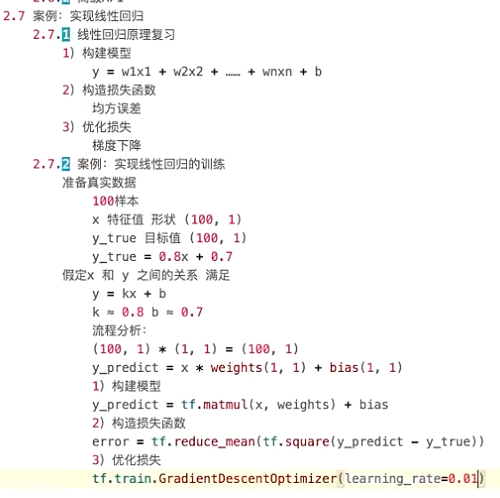

In [3]:
import tensorflow as tf
import numpy as np

# Step 1: Generate data
X = tf.random.normal(shape=[100, 1])
true_weights = tf.constant([[0.8]])
true_bias = tf.constant([[0.7]])
y_true = tf.matmul(X, true_weights) + true_bias

# Step 2: Initialize model parameters
weights = tf.Variable(tf.random.normal([1, 1]))
bias = tf.Variable(tf.random.normal([1, 1]))

# Step 3: Define the model
def model(X):
    return tf.matmul(X, weights) + bias

# Step 4: Loss function
def loss_function(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Step 5: Optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

print(f'init weights: {weights.numpy()}, init bias: {bias.numpy()}')
# Step 6: Training loop
for epoch in range(1001):
    with tf.GradientTape() as tape: # type(tape)=<class 'tensorflow.python.eager.backprop.GradientTape'>
        y_pred = model(X)
        loss = loss_function(y_pred, y_true)
    gradients = tape.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# After training
print(f"Trained weights: {weights.numpy()}, Trained bias: {bias.numpy()}")


'''
init weights: [[-1.3028593]], init bias: [[1.1753454]]
Epoch 0, Loss: 4.581268787384033
Epoch 100, Loss: 0.08630729466676712
Epoch 200, Loss: 0.0016864698845893145
Epoch 300, Loss: 3.391128120711073e-05
Epoch 400, Loss: 6.967345598241081e-07
Epoch 500, Loss: 1.4554221827722813e-08
Epoch 600, Loss: 3.0695637698308076e-10
Epoch 700, Loss: 6.203224565959342e-12
Epoch 800, Loss: 4.587343959555623e-12
Epoch 900, Loss: 4.587343959555623e-12
Epoch 1000, Loss: 4.587343959555623e-12
Trained weights: [[0.79999846]], Trained bias: [[0.70000154]]
'''

init weights: [[2.9006894]], init bias: [[-0.00402269]]
<class 'tensorflow.python.eager.backprop.GradientTape'>
Epoch 0, Loss: 5.209455490112305


<class 'tensorflow.python.eager.backprop.GradientTape'>
Epoch 100, Loss: 0.07288958877325058
<class 'tensorflow.python.eager.backprop.GradientTape'>
Epoch 200, Loss: 0.0011279704049229622
<class 'tensorflow.python.eager.backprop.GradientTape'>
Epoch 300, Loss: 1.9754224922508e-05
<class 'tensorflow.python.eager.backprop.GradientTape'>
Epoch 400, Loss: 3.9013616515148897e-07
<class 'tensorflow.python.eager.backprop.GradientTape'>
Epoch 500, Loss: 8.443658217061056e-09
<class 'tensorflow.python.eager.backprop.GradientTape'>
Epoch 600, Loss: 1.9594176281501063e-10
<class 'tensorflow.python.eager.backprop.GradientTape'>
Epoch 700, Loss: 4.733733370565485e-12
<class 'tensorflow.python.eager.backprop.GradientTape'>
Epoch 800, Loss: 4.733733370565485e-12
<class 'tensorflow.python.eager.backprop.GradientTape'>
Epoch 900, Loss: 4.733733370565485e-12
<class 'tensorflow.python.eager.backprop.GradientTape'>
Epoch 1000, Loss: 4.733733370565485e-12
Trained weights: [[0.8000016]], Trained bias: [[0.7

'\ninit weights: [[-1.3028593]], init bias: [[1.1753454]]\nEpoch 0, Loss: 4.581268787384033\nEpoch 100, Loss: 0.08630729466676712\nEpoch 200, Loss: 0.0016864698845893145\nEpoch 300, Loss: 3.391128120711073e-05\nEpoch 400, Loss: 6.967345598241081e-07\nEpoch 500, Loss: 1.4554221827722813e-08\nEpoch 600, Loss: 3.0695637698308076e-10\nEpoch 700, Loss: 6.203224565959342e-12\nEpoch 800, Loss: 4.587343959555623e-12\nEpoch 900, Loss: 4.587343959555623e-12\nEpoch 1000, Loss: 4.587343959555623e-12\nTrained weights: [[0.79999846]], Trained bias: [[0.70000154]]\n'

#### TFRecords
##### Example结构解析
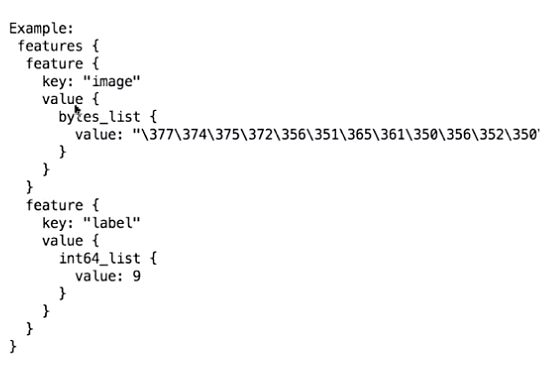


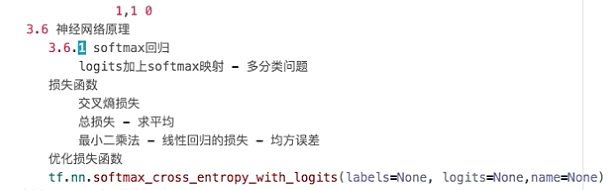